In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'nearest'

import numpy as np
from matplotlib import pyplot as plt

In [2]:
from skimage import io

image = io.imread('/home/hre070/MA/DJI_0095_CLIP.jpg')
#image = io.imread('/home/hre070/MA/dji_full.jpg')
#image = io.imread('/home/hre070/MA/Pics_Kalkofen/DJI_0095.JPG')

print(type(image))
print(image.size)



<class 'numpy.ndarray'>
1644300


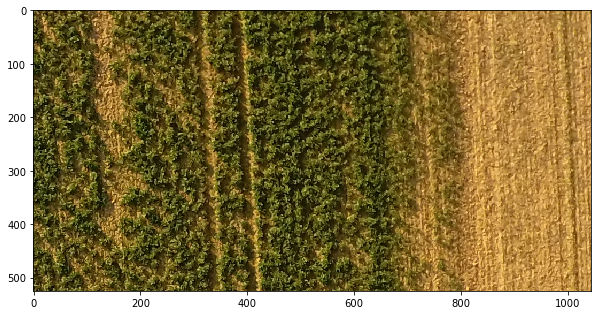

In [3]:
f, ax = plt.subplots(figsize=(10, 10))

ax.imshow(image);

# Superpixel, Words

In [4]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

In [5]:
#SLIC
segments_slic = slic(image, n_segments=150, compactness=30, sigma=1)
print('SLIC number of segments: {}'.format(len(np.unique(segments_slic))))

SLIC number of segments: 152


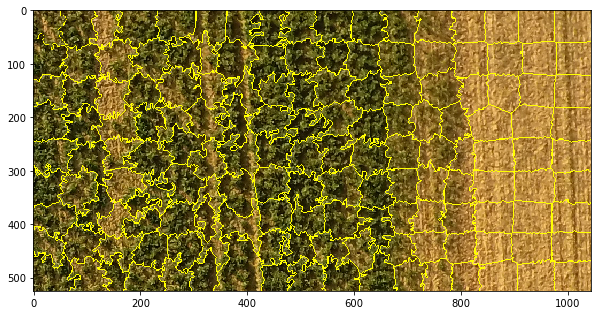

In [6]:
f, ax = plt.subplots(figsize=(10, 10))

ax.imshow(mark_boundaries(image, segments_slic));


In [7]:
#IMPORTS
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage.color import label2rgb
from skimage.color import rgb2gray

im_gray = rgb2gray(image)

print(im_gray.max(), im_gray.min())

0.909417254902 0.00666666666667


In [8]:
# settings for LBP
METHOD = 'ror'
radius = 1
n_points = 8 * radius

lbp = local_binary_pattern(im_gray, n_points, radius, METHOD)


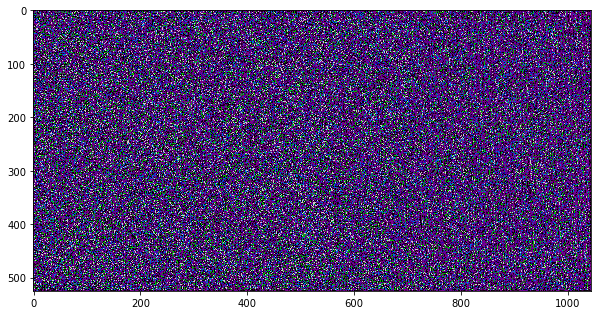

In [9]:
f, ax = plt.subplots(figsize=(10, 10))

#ax.imshow(image)
ax.imshow(lbp, cmap=plt.cm.spectral, alpha=1 )

### BOW_RAG class test:

In [10]:
import networkx as nx

import sys
sys.path.append('/home/hre070/MA/TextureSeg/')
sys.path.append('/home/hre070/MA/TextureSeg/LBP_BINS/')

#from bowrag import BOW_RAG, cumu_diff
import bow_rag
import bow_diff

In [11]:
import lbp_bins

In [13]:
BINS = lbp_bins.lbp_bins(n_points, METHOD)

#BINS

In [14]:
Graph = bow_rag.BOW_RAG(segments_slic, lbp, bins=BINS)

In [104]:
import copy

In [106]:
copy_node = copy.deepcopy(Graph.node[151])

In [19]:
Graph.node[151]

{'bow': {0.0: 234,
  1.0: 270,
  3.0: 262,
  5.0: 31,
  7.0: 511,
  9.0: 19,
  11.0: 26,
  13.0: 24,
  15.0: 788,
  17.0: 27,
  19.0: 24,
  21.0: 2,
  23.0: 29,
  25.0: 20,
  27.0: 22,
  29.0: 30,
  31.0: 516,
  37.0: 0,
  39.0: 21,
  43.0: 1,
  45.0: 2,
  47.0: 25,
  51.0: 3,
  53.0: 2,
  55.0: 20,
  59.0: 19,
  61.0: 21,
  63.0: 261,
  85.0: 0,
  87.0: 4,
  91.0: 2,
  95.0: 29,
  111.0: 15,
  119.0: 16,
  127.0: 276,
  255.0: 224},
 'labels': [151],
 'pixel count': 3776}

In [111]:
copy_node

{'bow': {0.0: 234,
  1.0: 270,
  3.0: 262,
  5.0: 31,
  7.0: 511,
  9.0: 19,
  11.0: 26,
  13.0: 24,
  15.0: 788,
  17.0: 27,
  19.0: 24,
  21.0: 2,
  23.0: 29,
  25.0: 20,
  27.0: 22,
  29.0: 30,
  31.0: 516,
  37.0: 0,
  39.0: 21,
  43.0: 1,
  45.0: 2,
  47.0: 25,
  51.0: 3,
  53.0: 2,
  55.0: 20,
  59.0: 19,
  61.0: 21,
  63.0: 261,
  85.0: 0,
  87.0: 4,
  91.0: 2,
  95.0: 29,
  111.0: 15,
  119.0: 16,
  127.0: 276,
  255.0: 224},
 'labels': [151],
 'pixel count': 3776}

In [15]:
print(nx.info(Graph))


Name: 
Type: BOW_RAG
Number of nodes: 152
Number of edges: 406
Average degree:   5.3421


In [16]:
Graph.calc_edge_weights()

In [17]:
Graph.calc_edge_weight_stats()

In [18]:
Graph.edge_weight_stats


{'max': 23.580999999999992,
 'mean': 10.99689408866995,
 'median': 10.424,
 'min': 4.790999999999997,
 'stdev': 3.390815928774248}

(array([  20.,   78.,  105.,   85.,   52.,   32.,   14.,   11.,    5.,    4.]),
 array([  4.791,   6.67 ,   8.549,  10.428,  12.307,  14.186,  16.065,
         17.944,  19.823,  21.702,  23.581]),
 <a list of 10 Patch objects>)

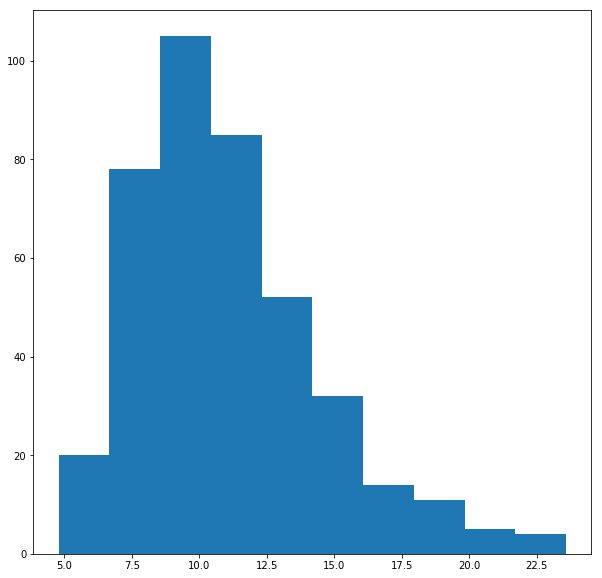

In [20]:
f, ax = plt.subplots(figsize=(10, 10))

#ax.imshow(image)
ax.hist(Graph.get_edge_weight_list())

In [21]:
Graph.get_edge_weight_list()

[4.790999999999997,
 4.947999999999998,
 5.028,
 5.283999999999998,
 5.315999999999998,
 5.331000000000001,
 5.401999999999999,
 5.587000000000001,
 5.6359999999999975,
 5.662999999999998,
 5.755999999999997,
 5.954999999999998,
 6.2490000000000006,
 6.2559999999999985,
 6.268999999999999,
 6.298000000000001,
 6.513999999999995,
 6.5520000000000005,
 6.569000000000002,
 6.661999999999999,
 6.718999999999998,
 6.74,
 6.798000000000004,
 6.82,
 6.921000000000001,
 6.9239999999999995,
 6.925,
 6.954000000000002,
 6.984999999999999,
 7.003000000000003,
 7.015,
 7.042999999999998,
 7.052,
 7.064000000000001,
 7.140999999999997,
 7.145,
 7.145999999999996,
 7.153999999999999,
 7.1839999999999975,
 7.257999999999999,
 7.318000000000003,
 7.332,
 7.332999999999997,
 7.340999999999999,
 7.3729999999999976,
 7.378000000000003,
 7.448,
 7.488999999999999,
 7.507,
 7.5189999999999975,
 7.627999999999999,
 7.630000000000002,
 7.634999999999996,
 7.643,
 7.6459999999999955,
 7.657,
 7.66500000000000

In [22]:
from skimage.future import graph
from skimage import segmentation, color

In [23]:
th = Graph.get_edge_weight_percentile(20, as_threshhold=True)
print(th)

8.146


In [24]:
merge_graph = Graph.copy()

In [25]:
merged = graph.merge_hierarchical(segments_slic, merge_graph, thresh=th, rag_copy=False,
                                   in_place_merge=True,
                                   merge_func=bow_rag._bow_merge_simple,
                                   weight_func=bow_diff._cumu_weight)



In [26]:
print(nx.info(merge_graph))

Name: 
Type: BOW_RAG
Number of nodes: 54
Number of edges: 106
Average degree:   3.9259


In [68]:
for node in merge_graph:
    print(node)
    
    
merge_graph.node[151]

151


{'bow': {0.0: 0.0,
  1.0: 0.0,
  3.0: 0.0,
  5.0: 0.0,
  7.0: 0.0,
  9.0: 0.0,
  11.0: 0.0,
  13.0: 0.0,
  15.0: 0.0,
  17.0: 0.0,
  19.0: 0.0,
  21.0: 0.0,
  23.0: 0.0,
  25.0: 0.0,
  27.0: 0.0,
  29.0: 0.0,
  31.0: 0.0,
  37.0: 0.0,
  39.0: 0.0,
  43.0: 0.0,
  45.0: 0.0,
  47.0: 0.0,
  51.0: 0.0,
  53.0: 0.0,
  55.0: 0.0,
  59.0: 0.0,
  61.0: 0.0,
  63.0: 0.0,
  85.0: 0.0,
  87.0: 0.0,
  91.0: 0.0,
  95.0: 0.0,
  111.0: 0.0,
  119.0: 0.0,
  127.0: 0.0,
  255.0: 0.0},
 'labels': [26,
  27,
  10,
  9,
  8,
  7,
  6,
  5,
  4,
  3,
  2,
  1,
  11,
  0,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  23,
  25,
  28,
  29,
  30,
  24,
  31,
  32,
  22,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87

In [70]:
Graph.node[151]

{'bow': {0.0: 0.164,
  1.0: 0.189,
  3.0: 0.184,
  5.0: 0.022,
  7.0: 0.358,
  9.0: 0.013,
  11.0: 0.018,
  13.0: 0.017,
  15.0: 0.553,
  17.0: 0.019,
  19.0: 0.017,
  21.0: 0.001,
  23.0: 0.02,
  25.0: 0.014,
  27.0: 0.015,
  29.0: 0.021,
  31.0: 0.362,
  37.0: 0.0,
  39.0: 0.015,
  43.0: 0.001,
  45.0: 0.001,
  47.0: 0.018,
  51.0: 0.002,
  53.0: 0.001,
  55.0: 0.014,
  59.0: 0.013,
  61.0: 0.015,
  63.0: 0.183,
  85.0: 0.0,
  87.0: 0.003,
  91.0: 0.001,
  95.0: 0.02,
  111.0: 0.011,
  119.0: 0.011,
  127.0: 0.194,
  255.0: 0.157},
 'labels': [151],
 'pixel count': 3776}

In [27]:
np.unique(merged)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [28]:
out = color.label2rgb(merged, image, kind='avg')
out = segmentation.mark_boundaries(out, merged, (0, 0, 0))

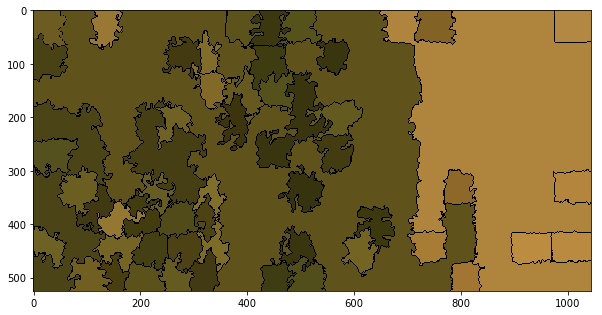

In [29]:
f, ax = plt.subplots(figsize=(10, 10))

ax.imshow(out);